In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
import scipy.fftpack
import cv2

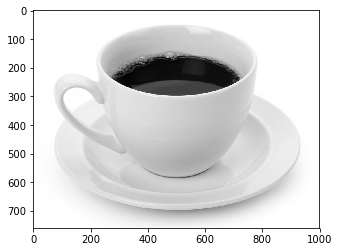

In [2]:
# load an image in black and white and show it
image = 'data//coffee.jpg'
# image = 'data//cookies.jpg'
im_gray = cv2.imread(image, 0)

fig = plt.figure()
plt.imshow( im_gray , cmap='gray')
y = plt.show()

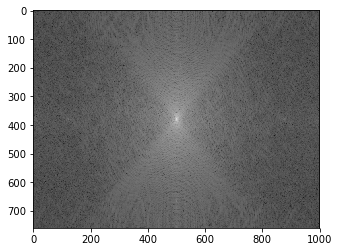

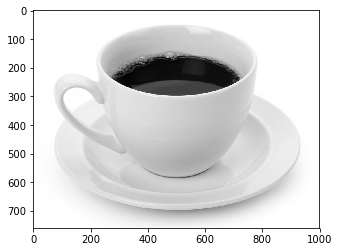

In [3]:
# show the frequency spectrum of that image 
y = scipy.fftpack.fft2(im_gray)
yshift = scipy.fftpack.fftshift(y)

plt.imshow(np.log10(abs(yshift)) ,cmap='gray')
plt.show()

# show the inversely transformed image (image is conserved)
x = scipy.fftpack.ifftshift(yshift)
im_return = scipy.fftpack.ifft2(x)

plt.imshow( abs(im_return),cmap = 'gray')
plt.show()

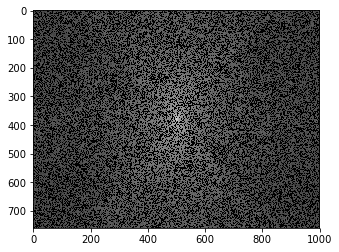

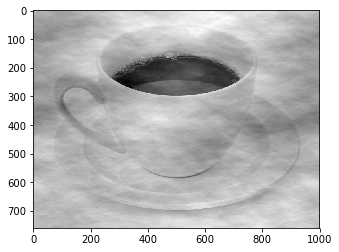

In [4]:
# Create a random Boolean mask
def create_random_mask(y,zero_fraction):
    rand_mask = np.random.random(y.shape)
    rand_mask[rand_mask>=zero_fraction] = 0
    mask = rand_mask.round().astype(bool)
    return mask

# Set masked frequency values to 0 that 
y_random = y.copy()
fraction_to_zero = 0.9
mask = create_random_mask(y_random, fraction_to_zero)
y_random[mask] = 0

# Plot frequency spectrum after mask is applied
yshift = scipy.fftpack.fftshift(y_random)
plt.imshow(np.log10(abs(yshift)+1) ,cmap='gray')
plt.show()

# transform masked image back to image-space and show it 
x = scipy.fftpack.ifftshift(y_random)
im_return = scipy.fftpack.ifft2(x)

plt.imshow( abs(im_return),cmap = 'gray')
plt.show()

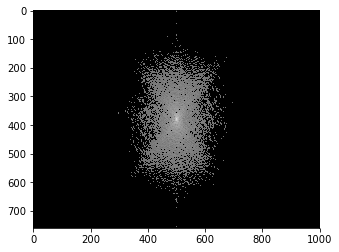

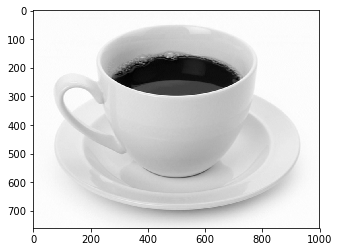

In [9]:

# Create a Boolean mask for lowest values
def create_smallValue_mask(y,zero_fraction):    
    N = y.shape[0]*y.shape[1]
    mask = abs(y).reshape(N)
    N_ratio = 0.9
    cutoff = np.round(N*N_ratio).astype(int)
    y_ind_lowtohigh = mask.argsort()
    mask[y_ind_lowtohigh[1:cutoff] ] = 1
    mask[y_ind_lowtohigh[cutoff+1::] ] = 0
    mask_shaped = np.reshape( mask.astype(bool), y.shape)
    return mask_shaped

# Set masked frequency values to 0 
y_smallValue = y.copy()
fraction_to_zero = 0.9
mask = create_smallValue_mask(y_smallValue,fraction_to_zero)
y_smallValue[mask] = 0

# Plot frequency spectrum after mask is applied
yshift = scipy.fftpack.fftshift(y_smallValue)
plt.imshow(np.log10(abs(yshift)+1) ,cmap='gray')
plt.show()

# transform masked image back to image-space and show it 
x = scipy.fftpack.ifftshift(y_smallValue)
im_return = scipy.fftpack.ifft2(x)

plt.imshow( abs(im_return),cmap = 'gray')
plt.show()

0
1
2


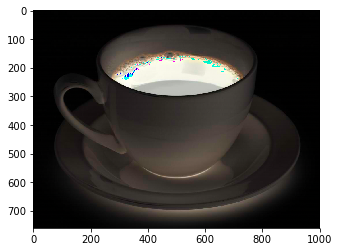

In [24]:

im_BGR = cv2.imread(image, 1)
N_colors = im_BGR.shape
fraction_to_zero = 1
mask = create_smallValue_mask(y_smallValue,fraction_to_zero)

y_BGR = np.empty(N_colors,dtype=np.complex_)
im_BGR_return = np.empty(N_colors,dtype=np.complex_)

for j in range(N_colors[2]):
    print(j)
    y_BGR[:,:,j] = scipy.fftpack.fft2(im_BGR[:,:,j])
#     y_BGR[mask,j] = 0
    im_BGR_return[:,:,j] = scipy.fftpack.ifft2(y_BGR[:,:,j])

# # Set masked frequency values to 0 
# y_smallValue = y.copy()
# fraction_to_zero = 0.9
# mask = create_smallValue_mask(y_smallValue,fraction_to_zero)
# y_smallValue[mask] = 0

# # Plot frequency spectrum after mask is applied
# yshift = scipy.fftpack.fftshift(y_smallValue)
# plt.imshow(np.log10(abs(yshift)+1) ,cmap='gray')
# plt.show()

# # transform masked image back to image-space and show it 
# x = scipy.fftpack.ifftshift(y_smallValue)
# im_return = scipy.fftpack.ifft2(x)
# RGB???
# plt.imshow( abs(im_BGR_return[:,:,[2,0,1]]))
plt.imshow( abs(im_BGR_return))
plt.show()